# Basic Image Classification Model

In [8]:
import tensorflow as tf

In [9]:
tf.__version__

'2.10.0'

In [10]:
from tensorflow.keras.datasets import mnist

In [11]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 7s 1us/step


In [12]:
x_train.shape

(60000, 28, 28)

In [13]:
x_test.shape

(10000, 28, 28)

In [14]:
import matplotlib.pyplot as plt
%matplotlib inline

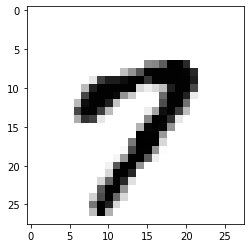

In [15]:
plt.imshow(x_train[15], cmap= "binary")
plt.show()

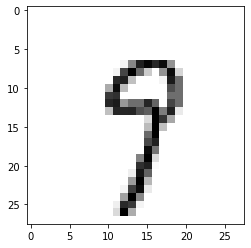

In [16]:
plt.imshow(x_train[1500], cmap= "binary")
plt.show()

In [17]:
set(y_train)

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}

In [19]:
from tensorflow.keras.utils import to_categorical

In [24]:
y_train_enc = to_categorical(y_train)
y_test_enc = to_categorical(y_test)

In [35]:
y_train[4]

9

In [27]:
y_train_enc[4]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=float32)

In [29]:
import numpy as np
x_train_reshaped = np.reshape(x_train, (60000, 784))
x_test_reshaped = np.reshape(x_test, (10000, 784))

In [30]:
x_train_reshaped.shape

(60000, 784)

In [34]:
x_train_reshaped[0]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   3,  18,  18,  18,
       126, 136, 175,  26, 166, 255, 247, 127,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,  30,  36,  94, 154, 17

In [36]:
x_mean = np.mean(x_train_reshaped)
x_std = np.std(x_train_reshaped)

In [37]:
epsilon = 1e-10
x_train_norm = (x_train_reshaped - x_mean)/ (x_std + epsilon)
x_test_norm = (x_test_reshaped - x_mean)/ (x_std + epsilon)

In [38]:
x_train_norm[0]

array([-0.42407389, -0.42407389, -0.42407389, -0.42407389, -0.42407389,
       -0.42407389, -0.42407389, -0.42407389, -0.42407389, -0.42407389,
       -0.42407389, -0.42407389, -0.42407389, -0.42407389, -0.42407389,
       -0.42407389, -0.42407389, -0.42407389, -0.42407389, -0.42407389,
       -0.42407389, -0.42407389, -0.42407389, -0.42407389, -0.42407389,
       -0.42407389, -0.42407389, -0.42407389, -0.42407389, -0.42407389,
       -0.42407389, -0.42407389, -0.42407389, -0.42407389, -0.42407389,
       -0.42407389, -0.42407389, -0.42407389, -0.42407389, -0.42407389,
       -0.42407389, -0.42407389, -0.42407389, -0.42407389, -0.42407389,
       -0.42407389, -0.42407389, -0.42407389, -0.42407389, -0.42407389,
       -0.42407389, -0.42407389, -0.42407389, -0.42407389, -0.42407389,
       -0.42407389, -0.42407389, -0.42407389, -0.42407389, -0.42407389,
       -0.42407389, -0.42407389, -0.42407389, -0.42407389, -0.42407389,
       -0.42407389, -0.42407389, -0.42407389, -0.42407389, -0.42

In [39]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [68]:
model = Sequential([
    Dense(128, activation = "relu", input_shape = (784,)),
    Dense(128, activation = "relu"),
    Dense(10, activation = "softmax")
])

In [71]:
model.compile(optimizer= "sgd",
             loss = "categorical_crossentropy",
             metrics = ["accuracy"])

In [72]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_13 (Dense)            (None, 128)               100480    
                                                                 
 dense_14 (Dense)            (None, 128)               16512     
                                                                 
 dense_15 (Dense)            (None, 10)                1290      
                                                                 
Total params: 118,282
Trainable params: 118,282
Non-trainable params: 0
_________________________________________________________________


In [73]:
model.fit(x_train_norm, y_train_enc, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3712 - accuracy: 0.8901
Epoch 2/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1839 - accuracy: 0.9457
Epoch 3/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1402 - accuracy: 0.9587
Epoch 4/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1141 - accuracy: 0.9664
Epoch 5/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0971 - accuracy: 0.9718


In [60]:

accuracy = model.evaluate(x_test_norm, y_test_enc)

313/313 [==============================] - 1s 2ms/step - loss: 0.1165 - accuracy: 0.9660


In [61]:
preds = model.predict(x_test_norm)

313/313 [==============================] - 1s 2ms/step


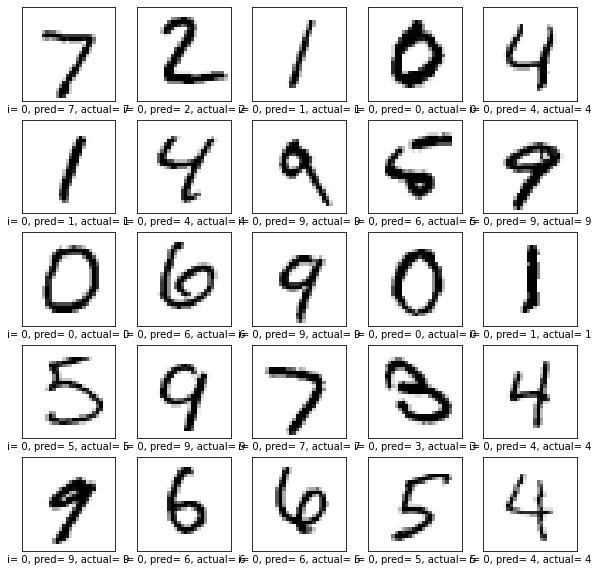

In [62]:
plt.figure(figsize=(10,10))
start_index = 0
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    pred = np.argmax(preds[start_index + i])
    actual = y_test[start_index + i]
    plt.xlabel("i= {}, pred= {}, actual= {}".format(start_index, pred, actual))
    plt.imshow(x_test[start_index + i], cmap= "binary")
plt.show()

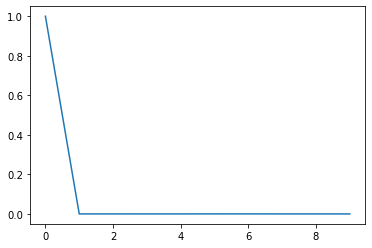

In [48]:
plt.plot(preds[10])
plt.show()

<a href="https://www.linkedin.com/in/muhammad-bilal-afzal-95b33323b/">MUHAMMAD BILAL</a>